## IT5437 - Computer Vision Assignment

#### Dissanayake D.M.K.M. 249298E

#### Implement the intensity transformation 

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_read = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

Preparing transform

51
100
105
256


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Kasun\AppData\Local\Temp\ipykernel_32152\1060460522.py:17: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


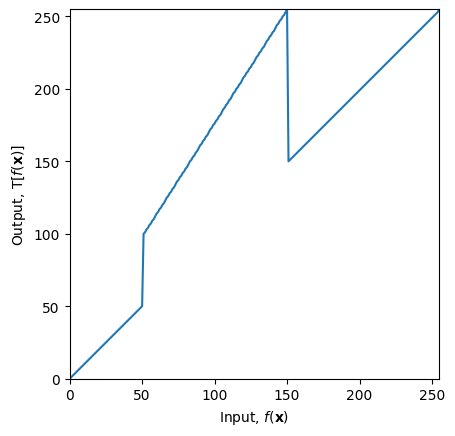

In [ ]:
t1 = np.linspace(0, 50, 51).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))
t3 = np.linspace(150, 255, 105).astype('uint8')
print(len(t3))
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

Add image transform

In [9]:
image_transformed = cv.LUT(image_read, transform)

In [11]:
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", image_read)
cv.waitKey(0)

cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
cv.imwrite('a1images/emma_gray.jpg', image_read)

True

In [12]:
cv.imwrite('a1images/emma_transformed.jpg', image_transformed)

True

Accentuate white matter

In [ ]:
image_brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_COLOR)

In [24]:
t1 = np.linspace(0, 200, 224).astype('uint8')          
t2 = np.linspace(250, 255, 32).astype('uint8')      
wm_transform = np.concatenate((t1, t2), axis=0)
# wm_transform = np.pad(wm_transform, (0, 256-len(wm_transform)), 'edge')

wm_img = cv.LUT(image_brain, wm_transform)

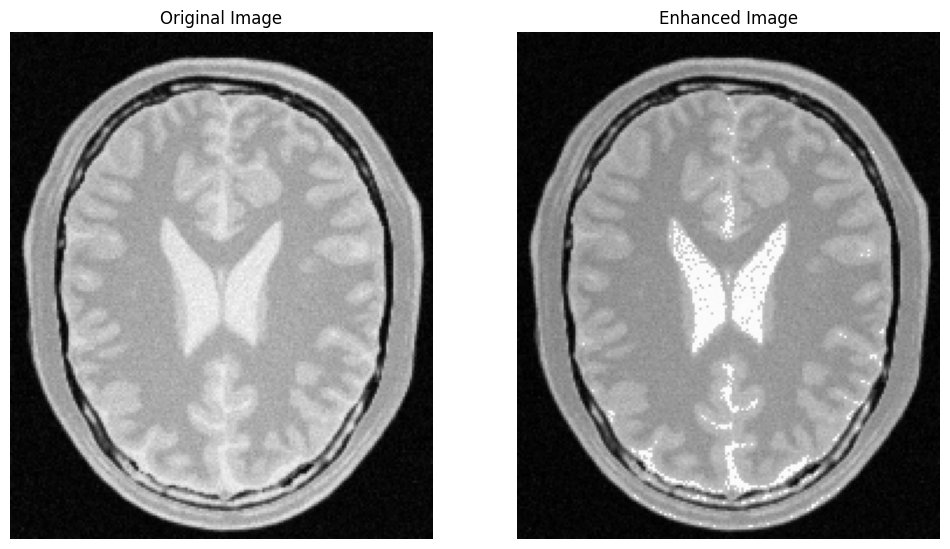

In [25]:
# Display
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image_brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(wm_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Kasun\AppData\Local\Temp\ipykernel_26936\2031813857.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


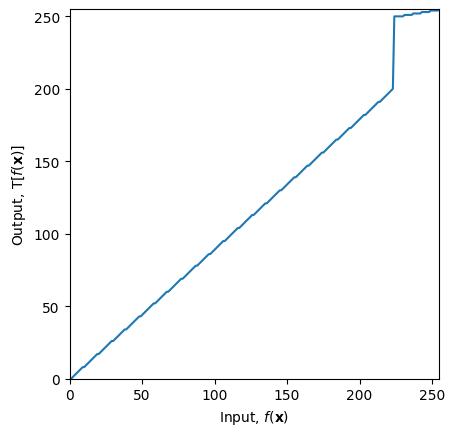

In [26]:
fig, ax = plt.subplots()
ax.plot(wm_transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

In [50]:
t3 = np.linspace(0, 110, 111).astype('uint8')          
t4 = np.linspace(110, 125, 50).astype('uint8')
t5 = np.linspace(160, 255, 95).astype('uint8')    
gm_transform = np.concatenate((t3, t4, t5), axis=0)

gm_img = cv.LUT(image_brain, gm_transform)

In [48]:
gm_transform.shape

(256,)

Accentuate gray matter

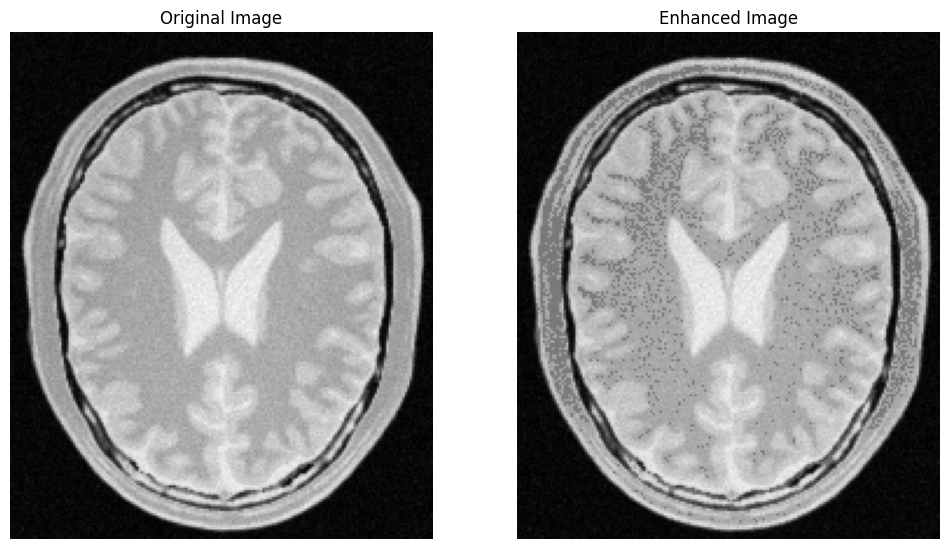

In [51]:
# Display
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image_brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(gm_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Kasun\AppData\Local\Temp\ipykernel_26936\770876122.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


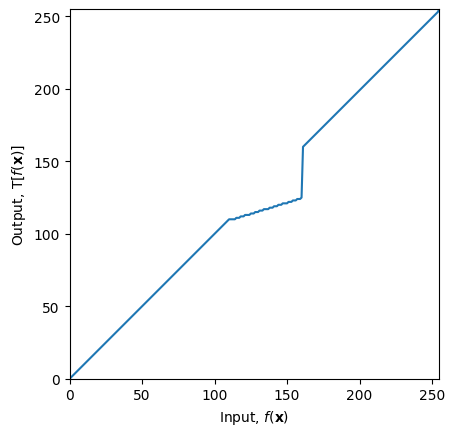

In [52]:
fig, ax = plt.subplots()
ax.plot(gm_transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

Gamma correction

In [9]:
image_gamma = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

In [10]:
image_gamma_rgb = cv.cvtColor(image_gamma, cv.COLOR_BGR2RGB)

Convert to LAB color space

In [11]:
lab_img = cv.cvtColor(image_gamma, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab_img)

In [24]:
gamma = 0.5
table = np.array([(i / 255.0) ** gamma * 255.0 for i in np.arange(0, 256)]).astype("uint8")

In [25]:
L_gamma  = cv.LUT(L, table)

In [26]:
lab_img = cv.merge([L_gamma, a, b])

In [27]:
image_gamma_corrected = cv.cvtColor(lab_img, cv.COLOR_LAB2BGR)

In [28]:
image_gamma_corrected_rgb = cv.cvtColor(image_gamma_corrected, cv.COLOR_BGR2RGB)

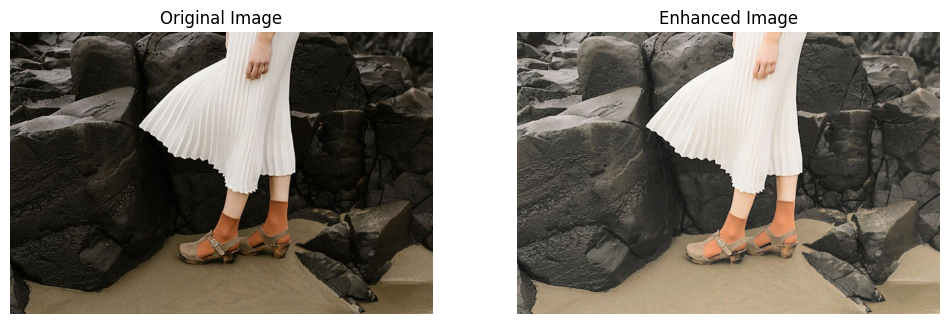

In [29]:
# Display
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image_gamma_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(image_gamma_corrected_rgb, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()

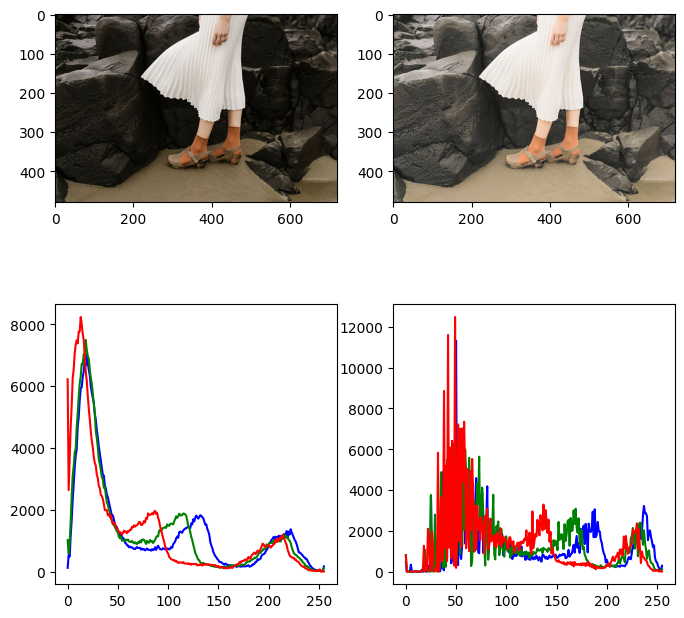

In [34]:
f, axarr = plt.subplots(2,2, figsize=(8,8))
axarr[0,0].imshow(image_gamma_rgb)
axarr[0,1].imshow(image_gamma_corrected_rgb)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([image_gamma_rgb], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([image_gamma_corrected_rgb], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    